## Probability in Medical Diagnostics and Sleep Analysis

### Setup and Dataset Exploration

**Step 1: Import Necessary Libraries**

# import necessary libraries

In [19]:
# Rod Agatep
# ECS 381 Final Project - Spring 2025

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli, binom, geom, hypergeom, poisson, ttest_ind

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Step 2: Load and Inspect the Dataset**

In [21]:
url = '/content/drive/My Drive/Sleep_health_and_lifestyle_dataset.csv' #'/content/Sleep_health_and_lifestyle_dataset.csv' # Replace with actual dataset URL
df = pd.read_csv(url)

Inspect dataset

In [22]:
print(df.head())
print(df.info())

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75      

Handle missing values
df = df.dropna() # Example: dropping rows with missing values

### Part 1: Probability Distributions (Your Implementation)


**Task 1: Bernoulli and Binomial Models**
- Define a binary outcome for good sleep quality (Quality ≥8).
- Conduct Bernoulli trials and use the Binomial distribution.

Probability of Good Sleep Quality: 0.481
10 Bernoulli Trials (1 = Good, 0 = Poor): [1 0 1 1 1 1 1 1 0 0]


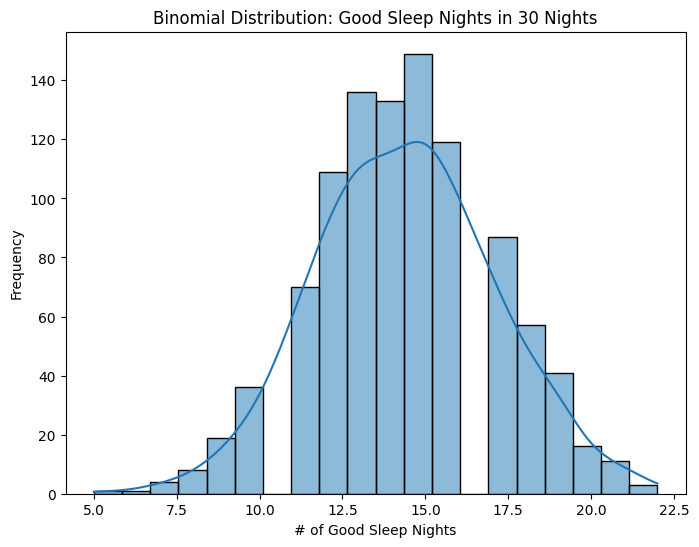

In [23]:
# Your Implementation Here
# define good sleep quality (quality >= 8)
# boolean entry
df['Good Sleep'] = df['Quality of Sleep'] >= 8

# probability of good sleep quality (bernoulli p)
p_good_sleep = df['Good Sleep'].mean()
print(f"Probability of Good Sleep Quality: {p_good_sleep:.3f}")

# simulate bernoulli trials with size of 10
bernoulli_trials = bernoulli.rvs(p=p_good_sleep, size=10)
print(f"10 Bernoulli Trials (1 = Good, 0 = Poor): {bernoulli_trials}")

# binomial distribution: # of good sleep nights in 30 nights (1 month)
n_trials = 30

# simulate 1000 binomial experiments, count # of good sleeps in 30 nights
binom_dist = binom.rvs(n=n_trials, p=p_good_sleep, size=1000)

# plot (histogram with kernel density estiamte curve)
plt.figure(figsize=(8, 6))
sns.histplot(binom_dist, bins=20, kde=True)
plt.title(f'Binomial Distribution: Good Sleep Nights in {n_trials} Nights')
plt.xlabel('# of Good Sleep Nights')
plt.ylabel('Frequency')
plt.show()

**Task 2: Geometric Distribution**
- Calculate the number of trials until you first observe poor sleep quality (Quality ≤4).

Probability of Poor Sleep Quality: 0.013


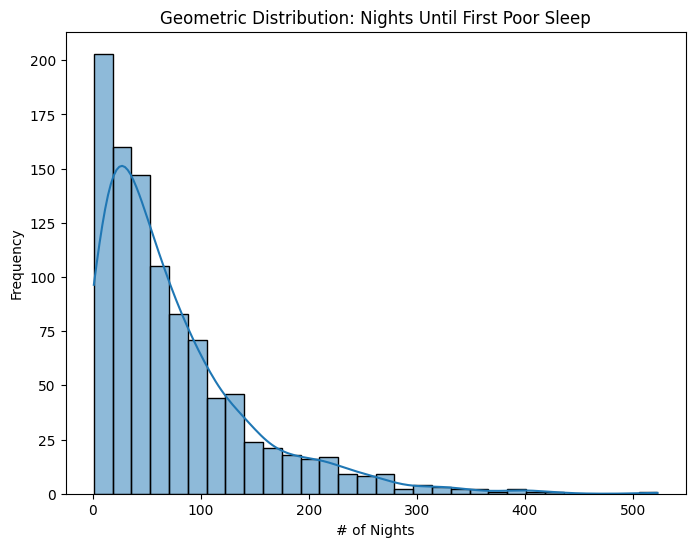

In [24]:
# Your Implementation Here
# define poor sleep quality (quality <= 4)
p_poor_sleep = (df['Quality of Sleep'] <= 4).mean()
print(f"Probability of Poor Sleep Quality: {p_poor_sleep:.3f}")

# simulate geometric distribution
geom_dist = geom.rvs(p=p_poor_sleep, size=1000)

# plot
plt.figure(figsize=(8, 6))
sns.histplot(geom_dist, bins=30, kde=True)
plt.title('Geometric Distribution: Nights Until First Poor Sleep')
plt.xlabel('# of Nights')
plt.ylabel('Frequency')
plt.show()


**Task 3: Hypergeometric Distribution**
- Perform hypergeometric sampling for a subgroup (e.g., high stress individuals).

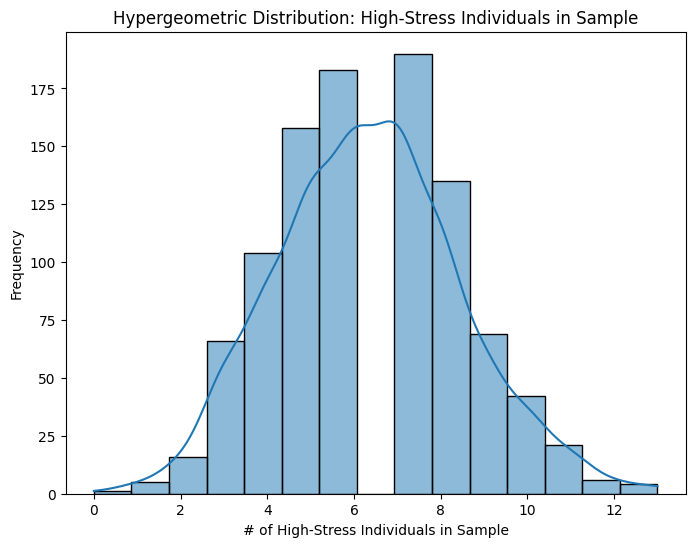

In [25]:
# Your Implementation Here
# define population: individuals with high stress
N = len(df)  # total population
K = (df['Stress Level'] >= 7).sum()  # of high-stress individuals
n = 20  # sample size

# hypergeo distribution
hypergeom_dist = hypergeom.rvs(M=N, n=K, N=n, size=1000)

# plot
plt.figure(figsize=(8, 6))
sns.histplot(hypergeom_dist, bins=15, kde=True)
plt.title('Hypergeometric Distribution: High-Stress Individuals in Sample')
plt.xlabel('# of High-Stress Individuals in Sample')
plt.ylabel('Frequency')
plt.show()

**Task 4: Poisson Distribution**
- Simulate the weekly occurrence of poor sleep quality cases.

Expected Poor Sleep Nights per Week: 0.094


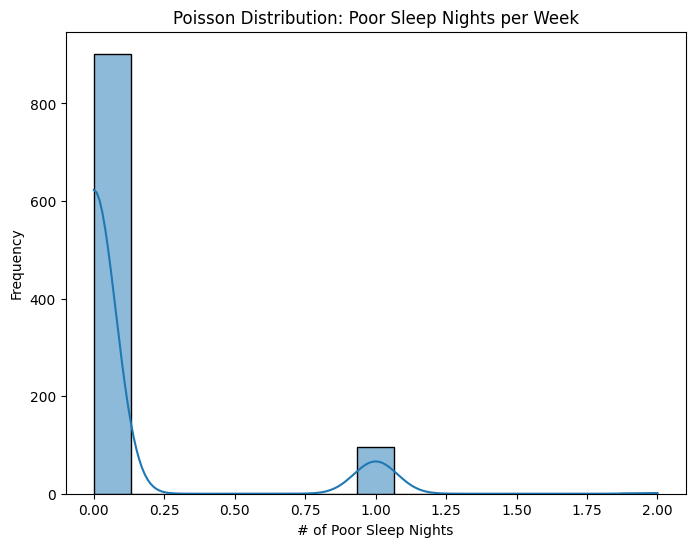

In [26]:
# Your Implementation Here
# assume average poor sleep nights per week
lambda_poor = p_poor_sleep * 7  # expected poor sleep nights per week
print(f"Expected Poor Sleep Nights per Week: {lambda_poor:.3f}")

# simulate poisson distribution
poisson_dist = poisson.rvs(mu=lambda_poor, size=1000)

# plot
plt.figure(figsize=(8, 6))
sns.histplot(poisson_dist, bins=15, kde=True)
plt.title('Poisson Distribution: Poor Sleep Nights per Week')
plt.xlabel('# of Poor Sleep Nights')
plt.ylabel('Frequency')
plt.show()

### Part 2: Bayesian Inference (Your Implementation)
- Update the probability of good sleep quality based on new evidence (e.g., low stress levels).


In [27]:
# Provided Bayesian Function
def bayes(prior, likelihood, evidence):
    return (likelihood * prior) / evidence

# Your Implementation Here
# prior: P(Good Sleep) from task 1, part 2
prior = p_good_sleep
print(f"Prior P(Good Sleep): {prior:.3f}")

# likelihood: P(Low Stress | Good Sleep)
low_stress = df['Stress Level'] <= 3

#calculates p of good sleepers with low stress
p_low_stress_given_good = (df[low_stress & df['Good Sleep']].shape[0] / df[df['Good Sleep']].shape[0])
print(f"Likelihood P(Low Stress | Good Sleep): {p_low_stress_given_good:.3f}")

# evidence: P(Low Stress)
p_low_stress = low_stress.mean()
print(f"Evidence P(Low Stress): {p_low_stress:.3f}")

# posterior / Bayes theorem: P(Good Sleep | Low Stress)
posterior = bayes(prior, p_low_stress_given_good, p_low_stress)
print(f"Posterior P(Good Sleep | Low Stress): {posterior:.3f}")

Prior P(Good Sleep): 0.481
Likelihood P(Low Stress | Good Sleep): 0.394
Evidence P(Low Stress): 0.190
Posterior P(Good Sleep | Low Stress): 1.000


### Part 3: Hypothesis Testing (Your Implementation)
- Conduct hypothesis testing to compare groups (e.g., low vs high stress levels) in terms of sleep quality.


In [28]:
# Your Implementation Here
# define groups: Low stress (stress lvl <= 3) vs. High stress (stress lvl >= 7)
low_stress_group = df[df['Stress Level'] <= 3]['Quality of Sleep']
high_stress_group = df[df['Stress Level'] >= 7]['Quality of Sleep']

# perform welch's t-test (assuming unequal variances) to compare 2 independent groups
t_stat, p_val = ttest_ind(low_stress_group, high_stress_group, equal_var=False)
print(f"T-test Results: t-statistic = {t_stat:.3f}, p-value = {p_val:.3f}")

# interpration based on 5% chance of error
alpha = 0.05
if p_val < alpha:
    print("Reject null hypothesis: Significant difference in sleep quality between low and high stress groups.")
else:
    print("Accept null hypothesis: No significant difference in sleep quality.")

T-test Results: t-statistic = 58.648, p-value = 0.000
Reject null hypothesis: Significant difference in sleep quality between low and high stress groups.


### Part 4: Visualization


**Histogram of Sleep Duration**


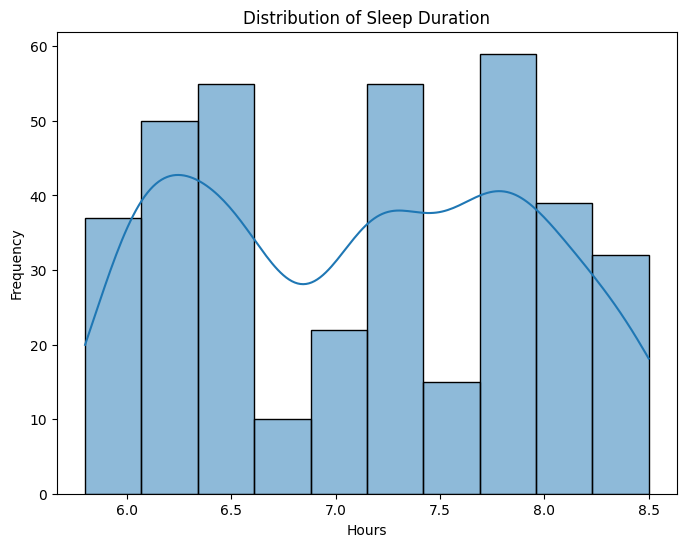

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Sleep Duration'], bins=10, kde=True)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

**Scatter Plot of Physical Activity vs. Sleep Quality**


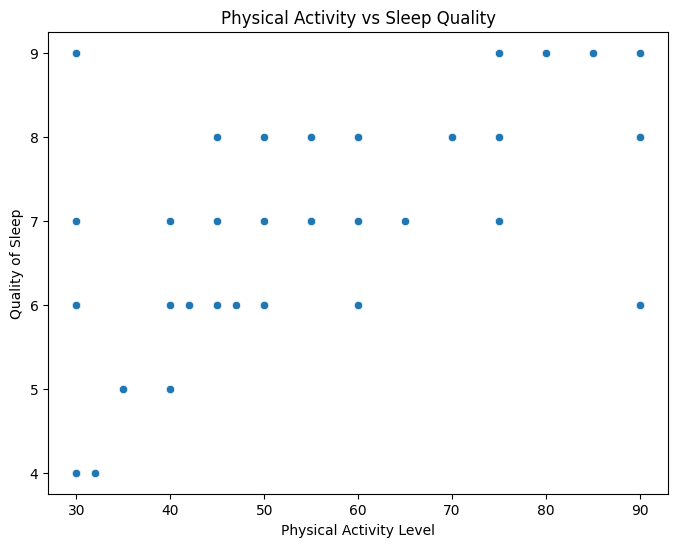

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Physical Activity Level', y='Quality of Sleep', data=df)
plt.title('Physical Activity vs Sleep Quality')
plt.xlabel('Physical Activity Level')
plt.ylabel('Quality of Sleep')
plt.show()


---

### **Submission Guidelines**
1. Submit your completed notebook (.ipynb file) with all code cells executed.
2. Ensure all markdown cells explain your steps clearly.
3. Include visualizations embedded within the notebook.

---

### Grading Criteria:
- Correct implementation of probability models (30 points).
- Accurate Bayesian inference calculations (20 points).
- Proper hypothesis testing with statistical significance (20 points).
- Quality of visualizations (20 points).
- Documentation and clarity within the notebook (10 points).

---
